In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns
import re
import datetime as dt
import calendar
#import datetime

# REQUERIMIENTOS DE APROBACIÓN

### a) Algunos campos, como belongs_to_collection, production_companies y otros (ver diccionario de datos) están anidados, esto es o bien tienen un diccionario o una lista como valores en cada fila, ¡deberán desanidarlos para poder y unirlos al dataset de nuevo hacer alguna de las consultas de la API! O bien buscar la manera de acceder a esos datos sin desanidarlos.

## I. TRANSFORMACIONES

In [ ]:
data_m = pd.read_csv("./Movies/movies_dataset_original.csv")
data_c = pd.read_csv("./Movies/credits.csv")

np.shape(data_m) #10 columns had mixed datatypes


C:\Users\USUARIO\AppData\Local\Temp\ipykernel_4312\522450108.py:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  data_m = pd.read_csv("./Movies/movies_dataset_original.csv")


(45466, 24)

In [4]:
data_m.head(2)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0


In [ ]:
# TITLES: lowercase
df['title'] = df['title'].str.lower()

In [5]:
np.shape(data_m)
data_m.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')

### I.1) Deleting columns that are not required

#### I.1.1) Eliminar las columnas que no serán utilizadas: 
#### > video,imdb_id,adult,original_title,poster_path y homepage.


In [6]:
# 'belongs_to_collection', 'genres', 'production_companies', 'production_countries', 'spoken_languages'

data_m =  data_m.drop(['video','imdb_id','adult','original_title','poster_path', 'homepage'], axis = 1)

In [7]:
data_m.columns # se muestran el nuevo df con las columnas eliminadas

Index(['belongs_to_collection', 'budget', 'genres', 'id', 'original_language',
       'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count'],
      dtype='object')

#### > 'original_language', 'overview', 'runtime', 'status', 'tagline', 

In [8]:
data_m =  data_m.drop(['original_language', 'overview', 'runtime', 'status', 'tagline', ], axis = 1)

In [9]:
data_m.columns # se muestran el nuevo df con las columnas eliminadas

Index(['belongs_to_collection', 'budget', 'genres', 'id', 'popularity',
       'production_companies', 'production_countries', 'release_date',
       'revenue', 'spoken_languages', 'title', 'vote_average', 'vote_count'],
      dtype='object')

# II. Editing columns with mixed datatype

Info aboout regex here: https://note.nkmk.me/en/python-re-match-object-span-group/

In [13]:
data_m.iloc[0]

belongs_to_collection    {'id': 10194, 'name': 'Toy Story Collection', ...
budget                                                            30000000
genres                   [{'id': 16, 'name': 'Animation'}, {'id': 35, '...
id                                                                     862
popularity                                                       21.946943
production_companies        [{'name': 'Pixar Animation Studios', 'id': 3}]
production_countries     [{'iso_3166_1': 'US', 'name': 'United States o...
release_date                                                    1995-10-30
revenue                                                        373554033.0
spoken_languages                  [{'iso_639_1': 'en', 'name': 'English'}]
title                                                            Toy Story
vote_average                                                           7.7
vote_count                                                          5415.0
Name: 0, dtype: object

II.1) belongs_to_collection    {'id': 10194, 'name': 'Toy Story Collection', ...

II.2) genres                   [{'id': 16, 'name': 'Animation'}, {'id': 35, '...

II.3) production_companies        [{'name': 'Pixar Animation Studios', 'id': 3}]

II.4) production_countries     [{'iso_3166_1': 'US', 'name': 'United States o...

II.5) spoken_languages                  [{'iso_639_1': 'en', 'name': 'English'}]

### II.1) 'belongs_to_collection'


In [14]:
data_collection = data_m['belongs_to_collection'].copy()

In [15]:
rows = data_collection.shape[0]
i = 0

while i < rows:

    text = str(data_collection[i])

    m = re.search('(?<=\'name\': \').*?(?= Collection)', text)

    if m is not None:
        data_collection[i] = m.group()
    i += 1



In [16]:
data_collection

0                  Toy Story
1                        NaN
2             Grumpy Old Men
3                        NaN
4        Father of the Bride
                ...         
45461                    NaN
45462                    NaN
45463                    NaN
45464                    NaN
45465                    NaN
Name: belongs_to_collection, Length: 45466, dtype: object

In [18]:
# REPLACING: with the new column
data_m['belongs_to_collection'] = data_collection
data_m.head(2)

,belongs_to_collection,budget,genres,id,popularity,production_companies,production_countries,release_date,revenue,spoken_languages,title,vote_average,vote_count
0,Toy Story,30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,21.946943,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Toy Story,7.7,5415.0
1,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,17.015539,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Jumanji,6.9,2413.0


## II.2) 'Spoken_Languages'

In [19]:
data_lan = data_m['spoken_languages'].copy()

In [20]:
data_lan

0                 [{'iso_639_1': 'en', 'name': 'English'}]
1        [{'iso_639_1': 'en', 'name': 'English'}, {'iso...
2                 [{'iso_639_1': 'en', 'name': 'English'}]
3                 [{'iso_639_1': 'en', 'name': 'English'}]
4                 [{'iso_639_1': 'en', 'name': 'English'}]
                               ...                        
45461               [{'iso_639_1': 'fa', 'name': 'فارسی'}]
45462                    [{'iso_639_1': 'tl', 'name': ''}]
45463             [{'iso_639_1': 'en', 'name': 'English'}]
45464                                                   []
45465             [{'iso_639_1': 'en', 'name': 'English'}]
Name: spoken_languages, Length: 45466, dtype: object

In [ ]:
i = 0
rows = data_lan.shape[0]

while i < rows:

    text = str(data_lan[i])
    m = re.findall('\'name\': \'(.*?)\'}', text)

    m_string = ', '.join(m)
    data_lan[i] = m_string

    i += 1

In [23]:
data_m['spoken_languages'] = data_lan
data_m.head(2)

,belongs_to_collection,budget,genres,id,popularity,production_companies,production_countries,release_date,revenue,spoken_languages,title,vote_average,vote_count
0,Toy Story,30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,21.946943,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,English,Toy Story,7.7,5415.0
1,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,17.015539,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,"English, Français",Jumanji,6.9,2413.0


## II.3) Genres

In [24]:
data_gen = data_m['genres'].copy()

In [25]:
i = 0
rows = data_gen.shape[0]

while i < rows:

    text = str(data_gen[i])
    m = re.findall('\'name\': \'(.*?)\'}', text)

    m_string = ', '.join(m)
    #print(m)
    data_gen[i] = m_string

    i += 1

In [26]:
data_m['genres'] = data_gen

# 4. 'production_countries'

 , 'production_companies' ----> left


In [28]:
data_co = data_m['production_countries'].copy()
data_co.head(5)

0    [{'iso_3166_1': 'US', 'name': 'United States o...
1    [{'iso_3166_1': 'US', 'name': 'United States o...
2    [{'iso_3166_1': 'US', 'name': 'United States o...
3    [{'iso_3166_1': 'US', 'name': 'United States o...
4    [{'iso_3166_1': 'US', 'name': 'United States o...
Name: production_countries, dtype: object

In [29]:
i = 0
rows = data_co.shape[0]

while i < rows:

    text = str(data_co[i])
    m = re.findall('\'name\': \'(.*?)\'}', text)

    m_string = ', '.join(m)
    #print(m_string)
    data_co[i] = m_string

    i += 1

In [30]:
data_m['production_countries'] = data_co
data_m.head(3)

,belongs_to_collection,budget,genres,id,popularity,production_companies,production_countries,release_date,revenue,spoken_languages,title,vote_average,vote_count
0,Toy Story,30000000,"Animation, Comedy, Family",862,21.946943,"[{'name': 'Pixar Animation Studios', 'id': 3}]",United States of America,1995-10-30,373554033.0,English,Toy Story,7.7,5415.0
1,NaN,65000000,"Adventure, Fantasy, Family",8844,17.015539,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...",United States of America,1995-12-15,262797249.0,"English, Français",Jumanji,6.9,2413.0
2,Grumpy Old Men,0,"Romance, Comedy",15602,11.7129,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...",United States of America,1995-12-22,0.0,English,Grumpier Old Men,6.5,92.0


## II.5) Production companies

In [ ]:
data_po = data_m['production_companies'].copy()
data_po.head(5)

0       [{'name': 'Pixar Animation Studios', 'id': 3}]
1    [{'name': 'TriStar Pictures', 'id': 559}, {'na...
2    [{'name': 'Warner Bros.', 'id': 6194}, {'name'...
3    [{'name': 'Twentieth Century Fox Film Corporat...
4    [{'name': 'Sandollar Productions', 'id': 5842}...
Name: production_companies, dtype: object

In [32]:
data_po[13]

"[{'name': 'Hollywood Pictures', 'id': 915}, {'name': 'Cinergi Pictures Entertainment', 'id': 1504}]"

In [33]:
i = 0
rows = data_po.shape[0]

while i < rows:

    text = str(data_po[i])
    m = re.findall('\'name\': \'(.*?)\'', text)

    m_string = ', '.join(m)
    #print(m_string)
    data_po[i] = m_string

    i += 1

In [34]:
data_m['production_companies'] = data_po
data_m.head(3)

,belongs_to_collection,budget,genres,id,popularity,production_companies,production_countries,release_date,revenue,spoken_languages,title,vote_average,vote_count
0,Toy Story,30000000,"Animation, Comedy, Family",862,21.946943,Pixar Animation Studios,United States of America,1995-10-30,373554033.0,English,Toy Story,7.7,5415.0
1,NaN,65000000,"Adventure, Fantasy, Family",8844,17.015539,"TriStar Pictures, Teitler Film, Interscope Com...",United States of America,1995-12-15,262797249.0,"English, Français",Jumanji,6.9,2413.0
2,Grumpy Old Men,0,"Romance, Comedy",15602,11.7129,"Warner Bros., Lancaster Gate",United States of America,1995-12-22,0.0,English,Grumpier Old Men,6.5,92.0


# III. Rellenando valores
### III. 1) Los valores nulos de los campos revenue, budget 
### deben ser rellenados por el número 0.

In [35]:
data_m[data_m['revenue'] == None]

,belongs_to_collection,budget,genres,id,popularity,production_companies,production_countries,release_date,revenue,spoken_languages,title,vote_average,vote_count


In [36]:
data_m['revenue'] = data_m['revenue'].fillna(0)

###  III.2) Los valores nulos del campo release date deben eliminarse.



In [37]:
data_m.dropna(subset=['release_date'], inplace=True)

In [38]:
data_m[data_m['release_date'] == None]

,belongs_to_collection,budget,genres,id,popularity,production_companies,production_countries,release_date,revenue,spoken_languages,title,vote_average,vote_count


### III.3) De haber fechas, deberán tener el formato AAAA-mm-dd, además deberán crear la columna release_year donde extraerán el año de la fecha de estreno.

In [39]:
data_rel = data_m['release_date'].copy()

In [40]:

i = 0
rows = data_rel.shape[0]

while i < rows:

    year = data_rel.iloc[i].split('-')[0]
    #m = re.search('(.*?)-', text)
    data_rel.iloc[i] = year

    i += 1

In [41]:
data_rel

0        1995
1        1995
2        1995
3        1995
4        1995
         ... 
45460    1991
45462    2011
45463    2003
45464    1917
45465    2017
Name: release_date, Length: 45379, dtype: object

In [42]:
data_m.columns.get_loc('release_date')

7

In [53]:
data_m.insert(8, 'release_year', data_rel)

In [54]:
data_m.head(2)

,belongs_to_collection,budget,genres,id,popularity,production_companies,production_countries,release_date,release_year,revenue,spoken_languages,title,vote_average,vote_count
0,Toy Story,30000000,"Animation, Comedy, Family",862,21.946943,Pixar Animation Studios,United States of America,1995-10-30,1995,373554033.0,English,Toy Story,7.7,5415.0
1,NaN,65000000,"Adventure, Fantasy, Family",8844,17.015539,"TriStar Pictures, Teitler Film, Interscope Com...",United States of America,1995-12-15,1995,262797249.0,"English, Français",Jumanji,6.9,2413.0


### III.4) Crear la columna con el retorno de inversión, llamada "return" con los campos revenue y budget, 
### dividiendo estas dos últimas revenue / budget, cuando no hay datos disponibles para calcularlo, deberá tomar el valor 0.

In [63]:
data_revenue = pd.to_numeric(data_m['revenue'].copy())
data_budget = data_m['budget'].copy()
#data_return = data_revenue/ data_budget

In [64]:

i = 0
rows = data_budget.shape[0]

while i < rows:

    value = data_budget.iloc[i] 

    if type(value) != str:
        prin(i)
        print(type(value))

    i += 1

In [65]:
data_budget[data_budget.str.isnumeric() == False]

19730    /ff9qCepilowshEtG2GYWwzt2bs4.jpg
29503    /zV8bHuSL6WXoD6FWogP9j4x80bL.jpg
35587    /zaSf5OG7V8X8gqFvly88zDdRm46.jpg
Name: budget, dtype: object

In [68]:
# checking not numeric values


list = [19730, 29503, 35587]

for i in list:
    
    value = data_budget[i]
    print(value)

/ff9qCepilowshEtG2GYWwzt2bs4.jpg
/zV8bHuSL6WXoD6FWogP9j4x80bL.jpg
/zaSf5OG7V8X8gqFvly88zDdRm46.jpg


### 3 values are not  numeric, we are going to replace those values

In [69]:
list = [19730, 29503, 35587]

for i in list:
    
    data_budget[i] = 0


In [70]:
#turns every value into a numeric one
data_budget = pd.to_numeric(data_budget)

### Creating the 'results' column:

In [84]:
r = str(round(100*np.shape(data_budget[data_budget == 0])[0]/np.shape(data_budget)[0], 1)) + '%'
r

'80.4%'

### From these, we know that the 80% of the budget can not be calculated:
### because will be divided by zero, so 'return' will be '0' in those cases

In [85]:
data_return = data_revenue/ data_budget

In [86]:
data_return.isna()

0        False
1        False
2         True
3        False
4        False
         ...  
45460     True
45462     True
45463     True
45464     True
45465     True
Length: 45379, dtype: bool

In [87]:
data_return.fillna(0)

0        12.451801
1         4.043035
2         0.000000
3         5.090760
4              inf
           ...    
45460     0.000000
45462     0.000000
45463     0.000000
45464     0.000000
45465     0.000000
Length: 45379, dtype: float64

In [89]:
# checking infinite values: 
data_return[data_return == np.inf]#.count()

4        inf
12       inf
30       inf
39       inf
56       inf
        ... 
45238    inf
45248    inf
45265    inf
45381    inf
45401    inf
Length: 2026, dtype: float64

In [90]:
#Replacing those 'inf' values

data_return.replace([np.inf, -np.inf], 0, inplace=True)

In [91]:
data_return = data_return.fillna(0)

In [92]:
data_return[data_return == pd.NA]#.count()

Series([], dtype: float64)

### Adding the new column to the dataframe:

In [93]:
data_m.head(2)

,belongs_to_collection,budget,genres,id,popularity,production_companies,production_countries,release_date,release_year,revenue,spoken_languages,title,vote_average,vote_count
0,Toy Story,30000000,"Animation, Comedy, Family",862,21.946943,Pixar Animation Studios,United States of America,1995-10-30,1995,373554033.0,English,Toy Story,7.7,5415.0
1,NaN,65000000,"Adventure, Fantasy, Family",8844,17.015539,"TriStar Pictures, Teitler Film, Interscope Com...",United States of America,1995-12-15,1995,262797249.0,"English, Français",Jumanji,6.9,2413.0


In [94]:
data_m.columns.get_loc('revenue')

9

In [95]:
data_m.insert(10, 'return', data_return)

In [96]:
data_m.head(2)

,belongs_to_collection,budget,genres,id,popularity,production_companies,production_countries,release_date,release_year,revenue,return,spoken_languages,title,vote_average,vote_count
0,Toy Story,30000000,"Animation, Comedy, Family",862,21.946943,Pixar Animation Studios,United States of America,1995-10-30,1995,373554033.0,12.451801,English,Toy Story,7.7,5415.0
1,NaN,65000000,"Adventure, Fantasy, Family",8844,17.015539,"TriStar Pictures, Teitler Film, Interscope Com...",United States of America,1995-12-15,1995,262797249.0,4.043035,"English, Français",Jumanji,6.9,2413.0


In [97]:
data_m.to_csv('./Movies/movies_dataset.csv')

### II.6) 'Spoken_languages'

In [98]:
data_sl = data_m['spoken_languages'].copy()

In [99]:
data_sl.unique()

array(['English', 'English, Français', 'English, Español', ...,
       'svenska, Deutsch', 'العربية, Polski', 'Fulfulde, English'],
      dtype=object)

### Deleting some of the languages

In [113]:
data_m = data_m[(data_m['spoken_languages'] != '普通话') | 
                (data_m['spoken_languages'] != '普通话, 한국어/조선말') | 
                (data_m['spoken_languages'] != 'العربية')]

In [138]:
data_lan = data_m['spoken_languages'].str.split(',',expand=True)
data_lan.head(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,English,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
1,English,Français,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None


#### 19 different languages!
#### We will keep just the 3 more frequents from the dataset

In [ ]:
col = np.shape(data_lan)[1]
lan_list = []

i = 0
while i < col:
    
    lan_list += data_lan[i].to_list()
    i += 1


In [170]:
letter_counts = Counter(lan_list)
language_freq = pd.DataFrame.from_dict(letter_counts, orient='index')
language_freq.head(5)


,0
English,26824
Français,2427
广州话 / 廣州話,405
普通话,413
Pусский,905


#### From the statistics, we will just use the first two languages: English and French

In [171]:
data_m = data_m[data_m['spoken_languages'].str.contains('English') | data_m['spoken_languages'].str.contains('Français')]

In [173]:
data_m.to_csv('./Movies/movies_dataset.csv')

In [175]:
data_m['release_date'].head(5)

0    1995-10-30
1    1995-12-15
2    1995-12-22
3    1995-12-22
4    1995-02-10
Name: release_date, dtype: object

### IV) Adding 2 more columns: month and day when where released

### IV.1) month where was released

In [ ]:
df = pd.read_csv('./Movies/movies_dataset.csv')

df_month = df['release_date'].copy()

i = 0
rows = df_month.shape[0]

while i < rows:

    month = df_month.iloc[i].split('-')[1]
    df_month.iloc[i] = month

    i += 1

In [179]:
df.columns.get_loc('release_year')

9

In [180]:
df.insert(10, 'release_month', df_month)

In [270]:
df['release_month'] = df['release_month'].astype(str)

In [274]:
type(df['release_month'].unique()[0])

str

In [275]:
df.to_csv('./Movies/movies_dataset.csv')

### IV.2) day where was released

In [183]:
df_day = df['release_date'].copy()

i = 0
rows = df_day.shape[0]

while i < rows:

    day = df_day.iloc[i].split('-')[2]
    df_day.iloc[i] = day

    i += 1

In [184]:
df.columns.get_loc('release_month')

10

In [189]:
df.insert(11, 'release_day', df_day)

In [190]:
df.head(2)

,Unnamed: 0,belongs_to_collection,budget,genres,id,popularity,production_companies,production_countries,release_date,release_year,release_month,release_day,revenue,return,spoken_languages,title,vote_average,vote_count
0,0,Toy Story,30000000,"Animation, Comedy, Family",862,21.946943,Pixar Animation Studios,United States of America,1995-10-30,1995,10,30,373554033.0,12.451801,English,Toy Story,7.7,5415.0
1,1,NaN,65000000,"Adventure, Fantasy, Family",8844,17.015539,"TriStar Pictures, Teitler Film, Interscope Com...",United States of America,1995-12-15,1995,12,15,262797249.0,4.043035,"English, Français",Jumanji,6.9,2413.0


In [194]:
df = df.drop('Unnamed: 0', axis = 1)
df.head(2)

,belongs_to_collection,budget,genres,id,popularity,production_companies,production_countries,release_date,release_year,release_month,release_day,revenue,return,spoken_languages,title,vote_average,vote_count
0,Toy Story,30000000,"Animation, Comedy, Family",862,21.946943,Pixar Animation Studios,United States of America,1995-10-30,1995,10,30,373554033.0,12.451801,English,Toy Story,7.7,5415.0
1,NaN,65000000,"Adventure, Fantasy, Family",8844,17.015539,"TriStar Pictures, Teitler Film, Interscope Com...",United States of America,1995-12-15,1995,12,15,262797249.0,4.043035,"English, Français",Jumanji,6.9,2413.0


In [195]:
df.to_csv('./Movies/movies_dataset.csv')

### II. Exploratory Data Analysis-EDA

#### some of this columns are not required for our analysis

In [198]:
df.columns

Index(['belongs_to_collection', 'budget', 'genres', 'id', 'popularity',
       'production_companies', 'production_countries', 'release_date',
       'release_year', 'release_month', 'release_day', 'revenue', 'return',
       'spoken_languages', 'title', 'vote_average', 'vote_count'],
      dtype='object')

In [202]:
df['belongs_to_collection'].count()/np.shape(df)[0]

## Just the 10% of the titles, belongs to a collection. For this case, we drop that column

0.105782838029075

In [203]:
df = df.drop('belongs_to_collection', axis = 1)
df.columns

Index(['budget', 'genres', 'id', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'release_year', 'release_month',
       'release_day', 'revenue', 'return', 'spoken_languages', 'title',
       'vote_average', 'vote_count'],
      dtype='object')

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_4312\1187118752.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap="YlGnBu", annot_kws={"size": 15  }, cbar=True, square=True, fmt='.2f')


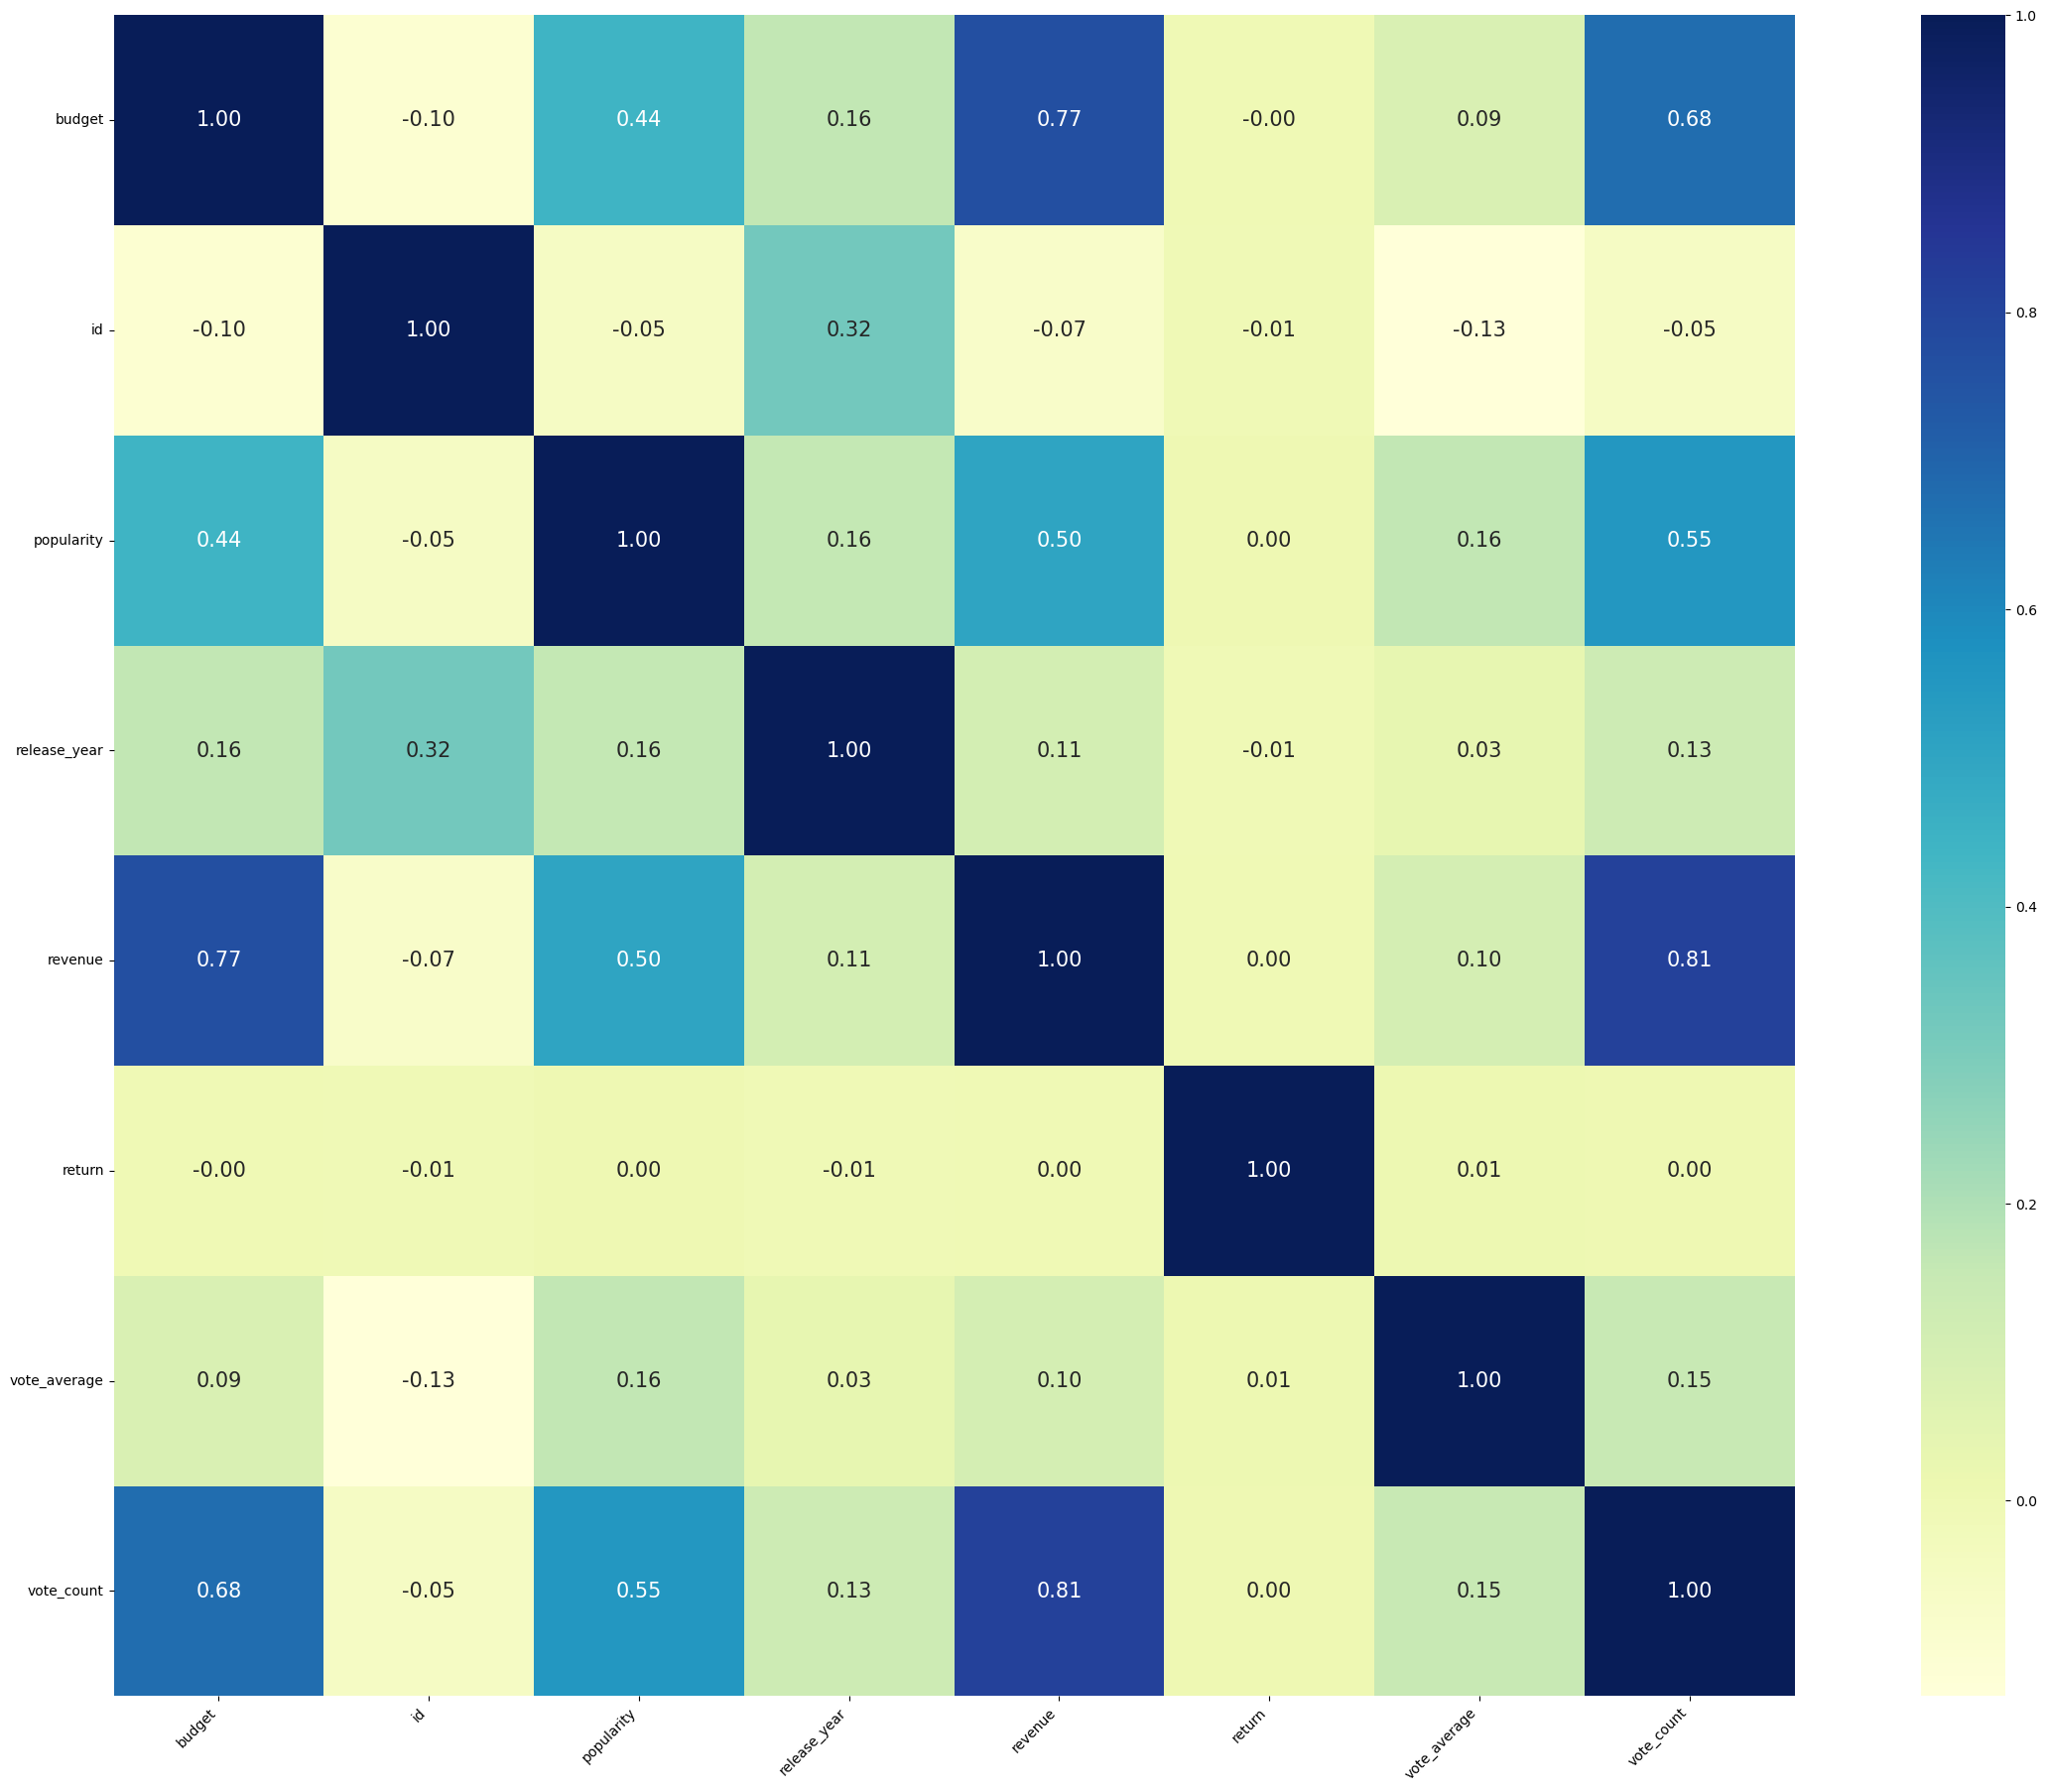

In [205]:
fig = plt.figure(figsize= (33,22))
sns.heatmap(df.corr(), annot=True, cmap="YlGnBu", annot_kws={"size": 15  }, cbar=True, square=True, fmt='.2f')
plt.xticks(rotation=45, horizontalalignment='right')
plt.yticks(rotation=0)
plt.show()

# V) Testing functions

In [16]:
df = pd.read_csv('./Movies/movies_dataset_test.csv')

In [17]:
np.shape(df)

(2000, 17)

### V.1) def score_titulo(titulo):

In [34]:
def score_titulo(titulo):

    # Ingresando el título de una filmación, da como respuesta:
    # - Título
    # - Año de estreno
    # - Score.

    #row = df[df['title'] == titulo].index[0]
    row = df.index[df['title'] == titulo][0]

    score = str(df['vote_average'][row])
    year = str(df['release_year'][row])

    sentence = 'La película \'' + titulo + '\' fue estrenada en el año ' + year + ' con un score/popularidad de: ' + score
    # (f"La pelicula {titulo}, fue estrenada en el año {year}, con un score/popularidad de: {score}")

    return sentence


In [32]:
titulo = 'jumanji'

In [35]:
score_titulo(titulo)

"La película 'jumanji' fue estrenada en el año 1995 con un score/popularidad de: 6.9"

### V.2) def votos_titulo(titulo):

In [36]:
def votos_titulo(titulo):

    # Ingresando el título de una filmación, devuelve:
    # - 1. Título
    # - 2. Cantidad de votos
    # - 3. Valor promedio de las votaciones
    # La variable (2) deberá de contar con al menos 2000 valoraciones, caso contrario, 
    # avisa que no cumple esta condición y que por ende, no se devuelve ningun valor.

    row = df.index[df['title'] == titulo][0]

    score = str(df['vote_average'][row])
    year = str(df['release_year'][row])

    voto_count = df['vote_count'][row]
    voto_str = 'La misma no tiene el número de votos mínimo para poder informar su votación'

    if voto_count >= 2000:

        voto_str = 'La misma cuenta con un total de ' + str(voto_count) + ' valoraciones, con un promedio de ' + score
       

    sentence = 'La película \'' + titulo + '\' fue estrenada en el año ' + year + '. ' + voto_str

    return sentence

In [37]:
votos_titulo(titulo)

"La película 'jumanji' fue estrenada en el año 1995. La misma cuenta con un total de 2413.0 valoraciones, con un promedio de 6.9"

### V.3) cantidad_filmaciones_mes(mes): 

In [50]:
dict_month = {'Enero':'1', 'Febrero':'2', 'Marzo':'3', 'Abril':'4', 'Mayo':'5', 'Junio':'6',
        'Julio':'7', 'Agosto':'8', 'Septiembre':'9', 'Octubre':'10', 'Noviembre': '11', 'Diciembre':'12'}

def cantidad_filmaciones_mes(mes): 

    # Se ingresa un mes en idioma Español. Devuelve: 
    # - Cantidad de películas estrenadas en el mes consultado, en la TOTALIDAD del dataset
    # It uses a dictionary created on the first sections of this script: 'dict_mont'

    amount = np.shape(df[df['release_month'].astype(str) == dict_month[mes]])[0]

    sentence = 'La cantidad de películas fueron estrenadas en el mes de ' + mes + ' fueron: ' + str(amount)

    return sentence

In [51]:
cantidad_filmaciones_mes('Julio')

'La cantidad de películas fueron estrenadas en el mes de Julio fueron: 151'

### V.4) cantidad_filmaciones_dia(dia): 

In [52]:
df['release_day'].unique()

array([30, 15, 22, 10, 16, 17, 13,  9, 21, 20, 27,  6, 11, 29, 18,  8, 19,
       14,  5,  2, 12, 26,  3,  1, 23, 31, 28, 24,  7, 25,  4],
      dtype=int64)

In [ ]:
df['release_day'].dt.dayofweek

AttributeError: Can only use .dt accessor with datetimelike values

### we get an error here, because that column isn't a datetime dataype, so dt.dayofweek can not be applied

#### Modifying that column:

In [ ]:
# Example:

"""date_str = '2023-02-28'
date_format = '%Y-%m-%d'

date_obj = dt.datetime.strptime(date_str, date_format)
type(date_obj)"""

datetime.datetime

In [83]:
df['release_date'] = pd.to_datetime(df['release_date'])

In [ ]:
#Getting the function
day_of_week = calendar.day_name[date_obj.weekday()]
day_of_week

'Tuesday'

### trying the function

In [ ]:
dict_month = {'Lunes':'Monday', 'Martes':'Tuesday', 'Miercoles':'Wednesday',
              'Jueves':'Thursday', 'Friday':'Viernes', 'Sabado':'Saturday', 'Domingo':'Sunday'}


def cantidad_filmaciones_dia(dia): 

    # Se ingresa un dia en idioma Español. Devuelve: 
    # - Cantidad de películas estrenadas en el dia consultado, en la TOTALIDAD del dataset
    # It uses a dictionary created on the first sections of this script: 'dict_dia'

    amount = np.shape(df[df['release_month'].astype(str) == dict_month[mes]])[0]

    sentence = 'La cantidad de películas fueron estrenadas en el mes de ' + mes + ' fueron: ' + str(amount)

    return sentence

## VI) Recomendation system

Since we don't have a database with specific user, we need to build a 'content-based filtering'.

First we need to delete some of the columns that are not longer required

In [206]:
df.columns

Index(['budget', 'genres', 'id', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'release_year', 'release_month',
       'release_day', 'revenue', 'return', 'spoken_languages', 'title',
       'vote_average', 'vote_count'],
      dtype='object')

In [276]:
test=pd.DataFrame(df[0:2000])


In [4]:
df = pd.read_csv('./Movies/movies_dataset.csv')
test = pd.read_csv('./Movies/movies_dataset_test.csv')

In [6]:
df.columns

Index(['Unnamed: 0', 'budget', 'genres', 'id', 'popularity',
       'production_companies', 'production_countries', 'release_date',
       'release_year', 'release_month', 'release_day', 'revenue', 'return',
       'spoken_languages', 'title', 'vote_average', 'vote_count'],
      dtype='object')

In [9]:
test.columns

Index(['Unnamed: 0', 'budget', 'genres', 'id', 'popularity',
       'production_companies', 'production_countries', 'release_date',
       'release_year', 'release_month', 'release_day', 'revenue', 'return',
       'spoken_languages', 'title', 'vote_average', 'vote_count'],
      dtype='object')

In [10]:
def score_titulo(title:str):

    # Ingresando el título de una filmación, da como respuesta:
    # - Título
    # - Año de estreno
    # - Score.

    row = df[df['title'] == title].index[0]

    score = str(df['vote_average'][row])
    year = str(df['release_year'][row])

    sentence = 'La película \'' + title + '\' fue estrenada en el año ' + year + ' con un score/popularidad de: ' + score
    
    return sentence

In [13]:
score_titulo('jumanji')

"La película 'jumanji' fue estrenada en el año 1995 con un score/popularidad de: 6.9"